# Machine Learning Python Exercise 2.1: Logistic Regression

In [1]:
import math
import numpy as np # linear algebra
from numpy import loadtxt, where
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import numpy.matlib
from scipy.stats import logistic # sigmoid function
import scipy.optimize as opt  

import os
print(os.listdir("../ex2"))

['.ipynb_checkpoints', 'Coursera_MachineLearningPython_ex2.zip', 'ex2data1.txt', 'ex2data2.txt', 'ex2_part_1.ipynb', 'Ex2_part_2_reg.ipynb', 'Old stuff']


## Instructions

This file  contains code that helps you get started on the exercise. You will need to complete functions in this exercise. The instructions can be found in this notebook, which will load the program as you complete the exercises. If you need to change the code in a certain section, it will be clearly indicated.

In [2]:
# Loading data
data = np.array(pd.read_csv('ex2data1.txt', sep=",", header=None)) # import data
X = data[:,0:2].reshape((100,2))   # initialize data X in 100x2 array
y = data[:,2].reshape((100,1))     # initialize data y in 100x1 array

### Complete this plotData file:
plotData plots the data points X and y into a new figure and gives the figure axis label population and profit

Instructions: Plot the training data into a figure. Set the axes labels using ax.set_xlabel and ax.set_ylabel. Positive examples are plotted with a '+' and negative examples are plotted with 'o'. X is assumed to be a $m x 2$ matrix

In [3]:
# Predefined function because python does not have a find() that Matlab has
def indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]

def plotData(x,y):  # define function to reference later
    ## Your code

    # Correct answer:
    pos = indices(y, lambda y: y > 0)  # filter the positive results (y = 1)
    neg = indices(y, lambda y: y == 0) # filter the negative results (y = 0)

    plt.scatter(X[pos,0], X[pos,1], color = 'k', marker = '+') # set plotting parameters (colour=red, marker=cross)
    plt.scatter(X[neg,0], X[neg,1], color = 'y', marker = 'o') # set plotting parameters (colour=red, marker=cross)
    plt.xlabel('Exam 1 score')  # set the x-axis label
    plt.ylabel('Profit in $10,000s')             # set the y-axis label
    plt.legend(['Admitted', 'Not admitted'])     # define the legend
    plt.show()                                   # plot the data

## Part 1: Plotting

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



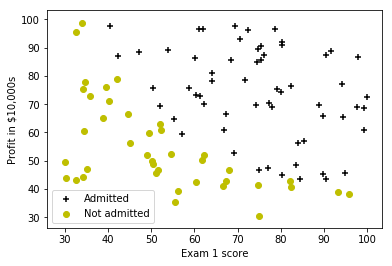

In [4]:
print('Plotting data with + indicating (y = 1) examples and o ' 
         'indicating (y = 0) examples.\n')

plotData(X, y) # Plot the data using the previously define plotData function

## Part 2: Compute Cost and Gradient

In [5]:
m, n = X.shape           # initialize m and n

ones = np.ones((len(X))) # initialize array with ones size 91x1
X = np.c_[ones,X]        # add a column of ones to x

initial_theta = np.zeros((n+1,1))  # initialize fitting parameters

### Complete this costFunction file
Compute cost computes and gradient for logistic regression.

Instructions: Compute the cost of a particular choice of theta. Compute the partial derivatives to calculate grad, which should have the same dimensions as theta.

In [6]:
# Initialize some useful values
m = len(y) # number of training examples

grad = np.zeros((initial_theta.shape))

def costFunction(theta, X, y):        # define function to reference later
    ## Your code
    
    # correct answer
    z = np.dot(X,theta) # X * theta
    h = logistic.cdf(z) # sigmoid(X*theta)
    
    J = 1/m * (np.dot((-y).conj().T, np.log(h))-np.dot((1-y).conj().T,np.log(1-h)))
    # 1/m * (-y'*log(h)-(1-y)'*log(1-h))
    
    grad = 1/m * np.dot(X.conj().T,(h-y)) # 1/m * X' * (h-y)
    return J, grad

In [7]:
cost, grad = costFunction(initial_theta, X, y) # saving J and grad in cost and grad respectively

print('Cost at initial theta (zeros): %f \n' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(' %f \n %f \n %f \n' % (grad[0], grad[1], grad[2]))
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')


Cost at initial theta (zeros): 0.693147 

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

 -0.100000 
 -12.009217 
 -11.262842 

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



## Part 3: Optimizing using fminunc's python counterpart: fmin_tnc

In [8]:
def cost(theta, X, y):
    theta = np.matrix(theta) # transform all the arrays to matrices for compatibility
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(logistic.cdf(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - logistic.cdf(X * theta.T)))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):  
    theta = np.matrix(theta) # transform all arrays to matrices for compatibility
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(len(theta)*3) # setting the number of parameters
    grad = np.zeros(parameters) # initializing grad

    error = logistic.cdf(X * theta.T) - y # calculating the loss of one example

    for i in range(parameters): 
        term = np.multiply(error, X[:,i]) # X' * (h-y)
        grad[i] = np.sum(term) / len(X)

    return grad
    
result = opt.fmin_tnc(func=cost, x0=initial_theta,
                           fprime=gradient, args=(X, y)) # function to optimise
# for theta
theta = result[0] # put the optimised theta values in variable theta
cost = cost(result[0], X, y) # calculate the cost with the optimised thetas

print('Cost at theta found by fminunc: %f \n' % cost)
print('Expected cost (approx): 0.203\n')
print('theta: \n')
print(' %f \n %f \n %f \n' % (theta[0], theta[1], theta[2]))
print('Expected theta (approx):\n')
print(' -25.161\n 0.206\n 0.201\n')

Cost at theta found by fminunc: 0.203498 

Expected cost (approx): 0.203

theta: 

 -25.161319 
 0.206232 
 0.201471 

Expected theta (approx):

 -25.161
 0.206
 0.201



### Plot decision boundary
X in the scatter plot is replaced with data[:, 0:2] because X is changed in this notebook and would not yield the same scatter plot anymore.

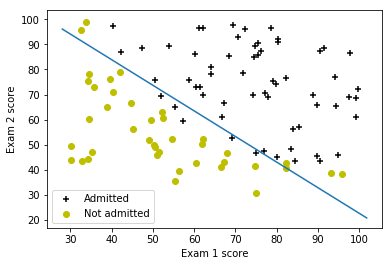

In [9]:
pos = indices(y, lambda y: y > 0)  # filter the positive results (y = 1)
neg = indices(y, lambda y: y == 0) # filter the negative results (y = 0)
plt.scatter((data[:,0:2])[pos,0], (data[:,0:2])[pos,1], label='Admitted', 
            color = 'k', marker = '+') # set plotting parameters 
plt.scatter((data[:,0:2])[neg,0], (data[:,0:2])[neg,1], label='Not admitted',
            color = 'y', marker = 'o')  # set plotting parameters (colour=red, 
                                        # marker=cross)
plot_x = [min(X[:,1])-2,  max(X[:,1])+2] # determine x-coordinates of boundary

plot_y = (-1/theta[2])*(np.multiply(theta[1],plot_x) + theta[0]) # determine y-coordinates
                                                    # of boundary


#plt.plot(X[:,1], np.dot(X,initial_theta), '-')       # plot regression line
plt.plot(plot_x, plot_y, '-')
plt.xlabel('Exam 1 score')  # set the x-axis label
plt.ylabel('Exam 2 score')  # set the y-axis label
plt.legend()                # set the legend with the previously defined 
                            # labels
plt.show()                  # plot the data

### Complete this predict file:
Predict whether the label is 0 or 1 using learned logistic regression parameters theta.

Instructions: Compute the cost of a particular choice of theta. Compute the partial derivatives to calculate grad, which should have the same dimensions as theta.

In [10]:
# Initialize some useful values
m = len(y) # number of training examples

p = np.zeros((m,1)) # initialize the p array with zeros

def predict(theta, X):        # define function to reference later
    ## Your code
    
    # correct answer
    z = np.dot(X,theta) # X*theta
    h = logistic.cdf(z) # sigmoid(z)
    
    for i in range(m):
        if h[i] >= 0.5: # threshold is set at 0.5
            p[i] = 1 # only positive predictions are changed to 1
    
    return p

## Part 4: Predict and Accuracies

After learning the parameters, you'll like to use it to predict the outcomes on unseen data. In this part, you will use the logistic regression model to predict the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be admitted.

Use the code in the previous section to predict the probability this student will be admitted.

In [11]:
prob = logistic.cdf(np.dot([1, 45, 85], theta)) # sigmoid(X*theta)

print('For a student with scores 45 and 85, we predict an admission '
         'probability of %f \n' % prob)
print('Expected value: 0.775 +/- 0.002\n\n')

# Compute accuracy on our training set
p = predict(theta, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) 
           else 0 for (a, b) in zip(p, y)] # find the correct instances where
# y and p have the same value

accuracy = (sum(map(int, correct)) % len(correct)) # calculate the percentage
# of right predictions/accuracy

print('Train Accuracy: %f \n' % accuracy)
print('Expected accuracy (approx): 89.0\n')
print('\n')

For a student with scores 45 and 85, we predict an admission probability of 0.776291 

Expected value: 0.775 +/- 0.002


Train Accuracy: 89.000000 

Expected accuracy (approx): 89.0



